# Install modules

In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

# Import libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Question 1 - Extracting Tesla Stock Data Using yfinance

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on. In this case the symbol for Tesla is `TSLA`.

In [3]:
tesla = yf.Ticker("TSLA")

With the ticker object we extract the stock data using the function `history`. We set the `period` parameter to `max` to get the maximum amount of data and we store it to the variable `tesla_share_info`.

In [4]:
tesla_share_info = tesla.history(period="max")

Reset the index of the `DataFrame` and display the first five rows using the function `head`

In [5]:
tesla_share_info.reset_index(inplace=True)
tesla_share_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

Define an `url` variable to store the locator. Then, download the raw data of the website using the `get` method and then parse it to a `BeautifulSoup` object.

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
url_text = requests.get(url).text
url_html = BeautifulSoup(url_text, 'html.parser')

Create a `DataFrame` named `telsa_revenue` to store the data with the columns `Date`, `Revenue` and `Change`.

In [7]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

We loop through the rows of the table using the `find_all` method and store the values in separate variables. After some formating is done, we append the variables to the `DataFrame`. Finally, we display the last 5 items using the `tail` method.

In [8]:
for row in url_html.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")

    if col[0].text and col[1].text:
        date = pd.to_datetime(col[0].text)
        revenue = float(col[1].text.replace("$", "").replace(",", ""))
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue.reset_index(drop=True)
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-09-30,46.0
52,2009-06-30,27.0


# Question 3 - Extracting GameStop Stock Data Using yfinance

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on. In this case the symbol for Tesla is `GME`.

In [9]:
gamestop = yf.Ticker("GME")

With the ticker object we extract the stock data using the function `history`. We set the `period` parameter to `max` to get the maximum amount of data and we store it to the variable `gamestop_share_info`.

In [10]:
gamestop_share_info = gamestop.history(period="max")

Reset the index of the `DataFrame` and display the first five rows using the function `head`

In [11]:
gamestop_share_info.reset_index(inplace=True)
gamestop_share_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

Define an `url` variable to store the locator. Then, download the raw data of the website using the `get` method and then parse it to a `BeautifulSoup` object.

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
url_text = requests.get(url).text
url_html = BeautifulSoup(url_text, 'html.parser')

Create a `DataFrame` named `gamestop_revenue` to store the data with the columns `Date`, `Revenue` and `Change`.

In [20]:
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

We loop through the rows of the table using the `find_all` method and store the values in separate variables. After some formating is done, we append the variables to the `DataFrame`. Finally, we sort the `DataFrame` in ascending order to check everything is fine.

In [21]:
for row in url_html.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")

    if col[0].text and col[1].text:
        date = pd.to_datetime(col[0].text)
        revenue = float(col[1].text.replace("$", "").replace(",", ""))
        gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gamestop_revenue.reset_index(drop=True)
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


# Question 5 - Tesla Stock and Revenue Dashboard

Using the `Matplotlib` module we create a plot of the stock price vs. the revenue by year. Since there are less inputs for revenue, we choose to display it as a bar plot.

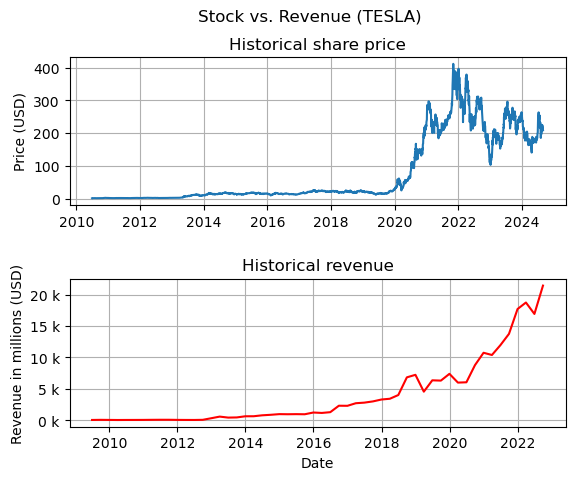

In [33]:
from matplotlib.ticker import EngFormatter

fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Stock vs. Revenue (TESLA)")

axs[0].plot(tesla_share_info["Date"], tesla_share_info["Open"])
axs[0].set_title("Historical share price")
axs[0].set_ylabel("Price (USD)")
axs[0].grid()

axs[1].plot(tesla_revenue["Date"], tesla_revenue["Revenue"]/1000, color="r")
axs[1].set_title("Historical revenue")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Revenue in millions (USD)")
fromatter0 = EngFormatter(unit="k")
axs[1].yaxis.set_major_formatter(fromatter0)
axs[1].grid()

# Question 6 - GameStop Stock and Revenue Dashboard

Using the `Matplotlib` module we create a plot of the stock price vs. the revenue by year. Since there are less inputs for revenue, we choose to display it as a bar plot.

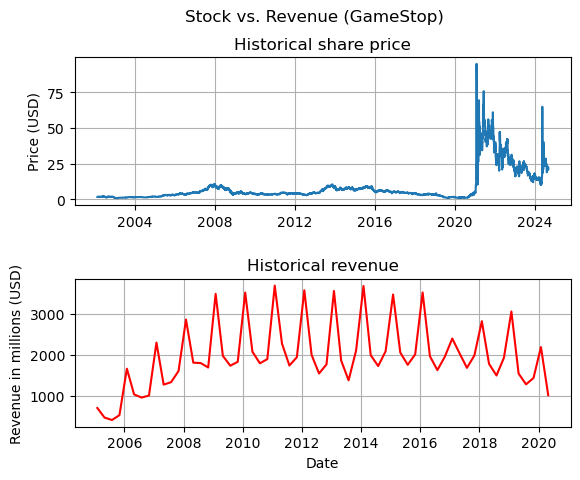

In [34]:
fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Stock vs. Revenue (GameStop)")

axs[0].plot(gamestop_share_info["Date"], gamestop_share_info["Open"])
axs[0].set_title("Historical share price")
axs[0].set_ylabel("Price (USD)")
axs[0].grid()

axs[1].plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color="r")
axs[1].set_title("Historical revenue")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Revenue in millions (USD)")
axs[1].grid()